In [16]:
% matplotlib nbagg
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

Traceback (most recent call last):
  File "C:\Users\eerca\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\Users\eerca\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\eerca\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [17]:
random.choice(list([1,2,3,4]))

4

In [27]:
sum(random.choice(range(10)) for i in range(10))

43

In [11]:
dim  = 2  # 2 dimensional system: coordinates denoted by (x,y)
nums = 1000 # number of steps
R    = np.zeros(dim) # particle position
V    = np.zeros(dim) # particle velocity(row or column vector?)
Rs   = np.zeros([dim,nums]) # history of particle position states == evolution of position states
Vs   = np.zeros([dim,nums]) # particle velocity (at all steps)
# Rs and Vs are defined to visualize the trajectory of position and velocity
Et   = np.zeros(nums) # total energy of the system (at all steps)
time = np.zeros(nums) # time (at all steps), timespan

In [12]:
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles, line, title
def animate(i): # define animation using Euler method
    global R,V,F,Rs,Vs,time,Et
    R, V = R+V*dt, V*(1-(zeta/m)*dt)-k/m*dt*R # Euler methods eq1&eq2 == update rules
    #R = R+V*dt
    #V = (1-(zeta/m)*dt)*V-k/m*dt*R
    Rs[0:dim,i] = R
    Vs[0:dim,i] = V
    time[i] = i*dt
    # time[i+1] = time[i] + dt === equivalent implementation
    Et[i]=0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])      # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles, line, title
    

<IPython.core.display.Javascript object>


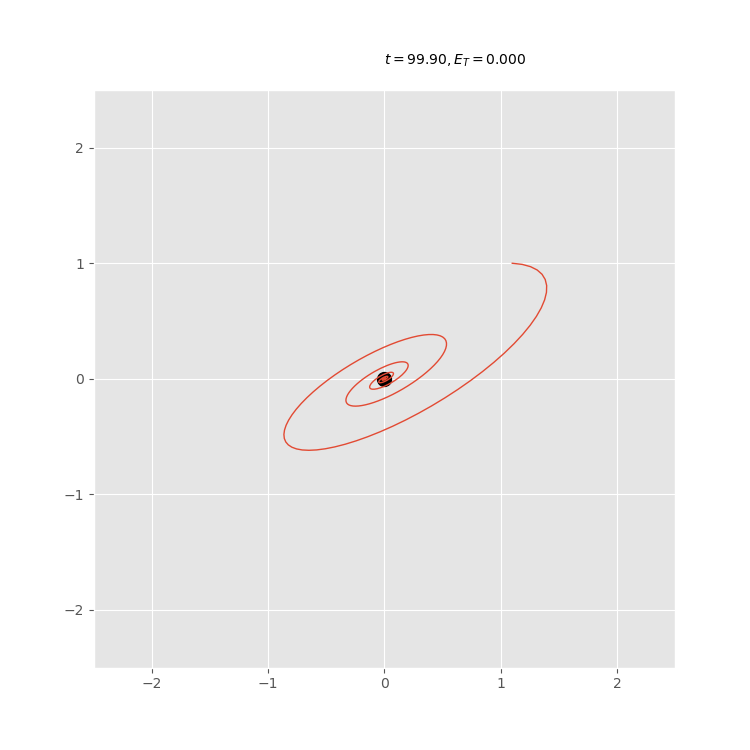

In [14]:
# System parameters
# particle mass, spring & friction constants
m    = 1.0
k    = 1.0
zeta = 0.4
# İnitial conditions
R[0] = 1. # Rx(0) 
R[1] = 1. # Ry(0)
V[0] = 1. # Vx(0)
V[1] = 0. # Vy(0)
dt   = 0.1#*np.sqrt(k/m) # time step
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim = (-box/2,box/2), ylim = (-box/2, box/2)) # draw range
particles, = ax.plot([],[], 'ko', ms = 10) # setup plot for particle
line,=ax.plot([],[],lw =1) # setup plot for trajectory
title = ax.text(0.5,1.05,r'', transform = ax.transAxes, va='center') # title
anim = animation.FuncAnimation(fig,animate,init_func=init,
       frames = nums, interval = 5, blit = True, repeat = False) # draw animation
# anim.save('movie.mp4', fps = 20, dpi = 400)


 Total energy of the harmonic oscillator
 
 $E_T(t) = E_{kinetic}(t) + E_{potential}(t) = \frac{1}{2}mV^2(t) + \frac{1}{2}kR^2(t)$

<IPython.core.display.Javascript object>


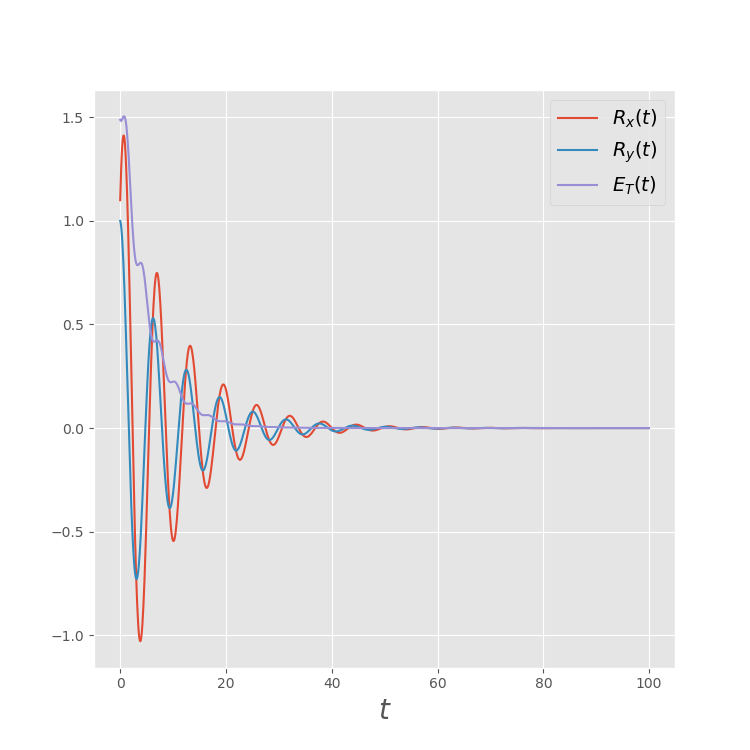

In [5]:
fig, ax = plt.subplots(figsize = (7.5,7.5))
ax.set_xlabel(r"$t$", fontsize = 20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t)
ax.legend([r'$R_x(t)$', r'$R_y(t)$', r'$E_T(t)$'], fontsize = 14)
plt.show()
